In [6]:
import sys
#Change path specificly to your directories
sys.path.insert(1, '/home/codahead/Fishial/FishialReaserch')

import torch
from PIL import Image
import torch
import torch.nn as nn
import torchvision.models as models
import requests
import json
import copy
import cv2
import numpy as np

from module.classification_package.src.utils import save_json
from module.classification_package.src.utils import read_json
from module.classification_package.src.dataset import FishialDataset
from module.classification_package.src.model import FcNet
from module.classification_package.src.model import Backbone
from module.classification_package.src.model import Model
from module.classification_package.src.loss_functions import TripletLoss, QuadrupletLoss
from module.classification_package.src.train import train
from module.classification_package.src.utils import reverse_norm_image
from module.classification_package.interpreter_classifier import ClassifierFC

import time
import torch


import os
import cv2

import matplotlib.pyplot as plt
import torchvision.models as models
import numpy as np
from torch import nn
from torch.optim import Optimizer, SGD
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torchvision import transforms
from sklearn.neighbors import KDTree
from PIL import Image
import numpy as np
import random
import sklearn.metrics.pairwise
import scipy.spatial.distance
from sklearn.metrics import confusion_matrix
import copy
import json
import time
import requests
from sklearn.metrics import classification_report


import warnings
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import logging
import torch
import json
import sys
import numbers

import numpy as np
from torchvision.transforms.functional import pad

np.set_printoptions(precision=20)
torch.set_printoptions(precision=20)

In [22]:
def predict_dataset(data_set, show = False):
    labels = [data_set.library_name[label]['label'] for label in data_set.library_name]
    test_sd = {data_set_train.library_name[label]['label']:[] for label in data_set_train.library_name}
    y_true = []
    y_pred = []

    count_true_predicted = 0

    for i in range(len(data_set)):
        print("Left: {}".format(len(data_set) - i), end='\r')
        rev_img = reverse_norm_image(data_set[i][0])
        
        true_class = data_set[i][1]
        output = model.inference(data_set[i][0])
        
        y_true.append(int(true_class))    
        y_pred.append(output[0][0])

        test_sd[labels[int(true_class)]].extend( [labels[match[0]] for match in output[1:4]] )

        if int(true_class) != output[0][0]:
            if show:
                print("P: {} N: {} id: {}".format(labels[int(true_class)], labels[output[0][0]], data_set.data_frame.iloc[i]['img_path']))
                plt.imshow(rev_img)
                plt.show()
        else:
            count_true_predicted += 1
    
    print('accuracy: {}'.format( (count_true_predicted)/len(data_set)))
    return y_true, y_pred, test_sd

In [3]:
model = ClassifierFC('../../../output/final_cross_cross_entropy_0.9896434634974534_223820.0.ckpt')

12/02/2021 11:35:11 - INFO - root - Initialization ClassifierFC finished in 0.16 [s]


In [4]:
loader = transforms.Compose([transforms.Resize((224, 224), Image.BILINEAR),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
data_set_train = FishialDataset(
        json_path="final_train.json",
        root_folder="/home/codahead/Fishial/FishialReaserch/datasets/cutted_fish",
        transform=loader
    )

# data_set_val = FishialDataset(
#         json_path="../dataset/data_test_full.json",
#         root_folder="/home/codahead/Fishial/FishialReaserch/datasets/cutted_fish",
#         transform=loader
#     )

/home/codahead/anaconda3/envs/d2go-env/lib/python3.6/site-packages/torchvision/transforms/transforms.py:322: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


P: Coryphaena hippurus N: Sciaenops ocellatus id: 5/00014304_9968.jpg


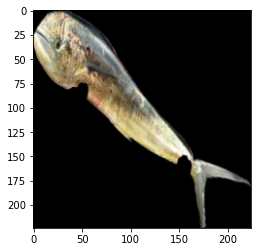

accuracy: 0.9998304510003391


In [23]:
y_true, y_pred, test_sd = predict_dataset(data_set_train, show = True)
y_true = np.array(y_true)
y_pred = np.array(y_pred)

In [ ]:
cohen_kappa_score(y_true, y_pred)
labels = [data_set_train.library_name[label]['label'] for label in data_set_train.library_name]

In [ ]:
dict_to_save = classification_report(y_true, y_pred, target_names=labels, output_dict=True)

In [ ]:
save_json(data = dict_to_save, path = 'output/cross_entropy_best.json')

In [ ]:
labels = [data_set_train.library_name[i]['label'] for i in data_set_train.library_name]
cm = confusion_matrix(y_true, y_pred, normalize='true')
fig, ax = plt.subplots(figsize=(30, 30))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp = disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=90)
plt.show()

In [ ]:
classification_report(y_true, y_pred, target_names=labels, output_dict=False)

In [ ]:
transform=transforms.Compose([transforms.Resize((224, 224), Image.BILINEAR),
                                  transforms.RandomHorizontalFlip(),
                                  transforms.RandomVerticalFlip(),
                              transforms.RandomRotation(degrees=(0, 90)),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [ ]:
data_main = read_json('../dataset/data_test_full.json')

In [ ]:
y_test = y_true
y_score = y_pred
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(y_test[0])
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(i, roc_auc[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[27], tpr[27], label='ROC curve (area = %0.2f)' % roc_auc[27])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [11]:
labels = {data_set_train.library_name[label]['label']:[] for label in data_set_train.library_name}

In [43]:
from collections import Counter

most_sim_dict = {}
for i in test_sd:
    
    n_max = 6
    keyss = list(Counter(test_sd[i]).keys()) # equals to list(set(words))
    conts = np.array(list(Counter(test_sd[i]).values())) # counts the elements' frequency
    idx = conts.argsort()[-n_max:][::-1]
#     print(10*'*')
#     print("main name: ",i,len(test_sd[i]))
#     print([[conts[ind], round((conts[ind]/len(test_sd[i]))*100, 3)] for ind in idx])
    most_sim_dict.update({
        i: [keyss[ind] for ind in idx if round((conts[ind]/len(test_sd[i]))*100, 3) > 5]
    })